# Models

DAMUTA provides several latent variable models for probabilistic mutational signature analysis. Here, models are visualized with [graphviz](https://graphviz.org/).

PyMC3 has some tutorials to help you get familiar with [dirichlet-multinomial](https://www.pymc.io/projects/examples/en/latest/mixture_models/dirichlet_mixture_of_multinomials.html) models.

## Choosing a Model

### Overview of available models (Lda, TandemLda, HierarchicalTandemLda)

Damuta offers three main types of models:

1. **Lda (Latent Dirichlet Allocation)**: 
   - Provided primarily as a baseline for comparison with other probabilistic models.
   - Not recommended for fitting COSMIC activities in practice.

2. **TandemLda (Tandem Latent Dirichlet Allocation)**:
   - Use when you don't have hierarchical sample information.
   - Suitable for most mutational signature analysis tasks.

3. **HierarchicalTandemLda (Hierarchical Tandem Latent Dirichlet Allocation)**:
   - Use when you have hierarchical sample information (e.g., tissue type).
   - Provides more nuanced analysis by incorporating sample metadata.

### When to use each model

- **HierarchicalTandemLda**: 
  - Choose this model if you have hierarchical sample information, such as tissue type.
  - It allows for more detailed analysis by incorporating sample metadata.

- **TandemLda**: 
  - Use when you don't have hierarchical sample information.
  - Suitable for standard mutational signature analysis.

- **Lda**: 
  - Primarily used as a baseline for comparing other probabilistic models.
  - Not recommended for practical COSMIC activity fitting.
  - If you need to fit COSMIC activities, consider using tools like SigProfiler or deconstructSigs instead.




In [9]:
import pymc3 as pm
import arviz as az
import numpy as np
import pandas as pd
import damuta as da
import matplotlib.pyplot as plt
from damuta.models import Lda, TandemLda, HierarchicalTandemLda

In [10]:
# Load data
counts = pd.read_csv('example_data/pcawg_counts.csv', index_col=0)
annotation = pd.read_csv('example_data/pcawg_cancer_types.csv', index_col=0)
pcawg = da.DataSet(counts, annotation)


## Baseline model

Dirichlet-multinomial set up like latent dirichlet allocation. Infers COSMIC-format 96-dimensional mutational signatures and their activities.

![LDA Model](example_data/lda.png)

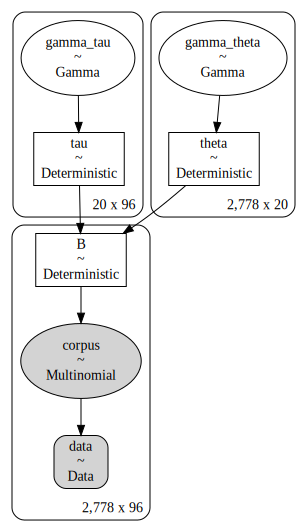

In [14]:
lda = Lda(pcawg, n_sigs = 20)
lda._build_model(**lda._model_kwargs)
pm.model_graph.model_to_graphviz(lda.model)

## Tandem LDA

Two LDA's at once! Infers Damage and Misrepair signatures and their activities. 


![Tandem LDA Model](example_data/t_lda.png)

In [ ]:
t_lda = TandemLda(pcawg, n_damage_sigs = 18, n_misrepair_sigs=6)
t_lda._build_model(**t_lda._model_kwargs)
pm.model_graph.model_to_graphviz(t_lda.model)


## Hierarchical Tandem LDA

The full Hierarchical Tandem LDA model is similar to the Tandem LDA model, with an added hierarchical prior to incorporate information shared across tissue-type. Infers Damage and Misrepair signatures, their activities, and their tissue-specific sparsity.

![Hierarchical Tandem LDA Model](example_data/ht_lda.png)


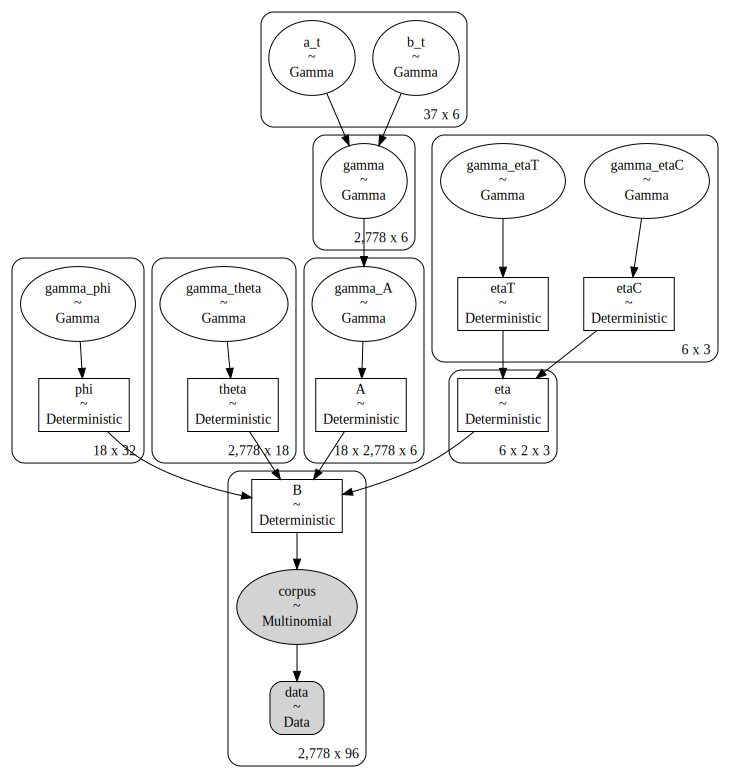

In [13]:
ht_lda = HierarchicalTandemLda(pcawg, type_col="pcawg_class", n_damage_sigs = 18, n_misrepair_sigs=6)
ht_lda._build_model(**ht_lda._model_kwargs)
pm.model_graph.model_to_graphviz(ht_lda.model)